In [6]:
import os
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
import networkx
from nltk import bigrams

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [7]:
consumer_key= '1EbEbqZpTKOsGo46iIlMLVZV3'
consumer_secret= 'MsaVvkSGVUkwkAalHfqNxSY6raOSjkn9e9uDmgf9a7e5a63ZBC'
access_token= '1153053655903428608-ERZK04gJccvOmrWrBXMY8MTLbvnSDC'
access_token_secret= '4fwZlaNOhdLP0JA20ASwehJLsnIPJhXteOTEWeSPQ1cvW'

In [8]:
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

In [9]:
#Search Twitter for Tweets

search_terms = "#flash+floods"
#Define the search term
date_since = "2019-01-11"
#Define the data searching these tweets from

new_search = search_terms + "-filter:retweets"
'''Adding "-filter:retweets" to your query ignores all
of the retweets'''

tweets = tw.Cursor(api.search,
                   q=new_search,
                  lang='en',
                  since=date_since).items(1000)
'''.Cursor() returns an object that you can loop over
to access the data collected. Each item in the iterator
has various attributes that you can access to get information
about each tweet including:
1. the text of the tweet
2. who sent the tweet
3. the date the tweet was sent
The loop goes through the object and prints the text
associated with each tweet
Using a list comprehension provides an efficient way to
collect object elements contained within an iterator as a list'''
t = [tweet.text for tweet in tweets]
t

['SEVERE STORM OUTLOOK for rest of the night    See maps and Radar maps and zoom in at     https://t.co/HNLPnb8GMF… https://t.co/ZL8eMw1tTb',
 'SEVERE STORM OUTLOOK for rest of the night    See maps and Radar maps and zoom in at     https://t.co/y9EPeXL1Du… https://t.co/WIqWEUY21o',
 'SEVERE STORM OUTLOOK for afternoon and evening     See maps and Radar maps and zoom in at… https://t.co/V09cDg0qcF',
 'SEVERE STORM OUTLOOK for afternoon and evening     See maps and Radar maps and zoom in at… https://t.co/bspEQ3lupg',
 'SEVERE STORM OUTLOOK for afternoon and evening     See maps and Radar maps and zoom in at… https://t.co/fP6vjLgBsl',
 'SEVERE STORM OUTLOOK for this afternoon     See maps and Radar maps and zoom in at     https://t.co/y9EPeY2D24… https://t.co/RTjb4hUL3i',
 'SEVERE STORM OUTLOOK for this afternoon     See maps and Radar maps and zoom in at     https://t.co/y9EPeY2D24… https://t.co/BvwcISGoer',
 'SEVERE STORM OUTLOOK for your Saturday.     See maps and Radar maps and zoom 

In [10]:
tweet_pd = pd.DataFrame(data=t,
                columns=['List of Tweets'])
tweet_pd

,List of Tweets
0,SEVERE STORM OUTLOOK for rest of the night ...
1,SEVERE STORM OUTLOOK for rest of the night ...
2,SEVERE STORM OUTLOOK for afternoon and evening...
3,SEVERE STORM OUTLOOK for afternoon and evening...
4,SEVERE STORM OUTLOOK for afternoon and evening...
5,SEVERE STORM OUTLOOK for this afternoon Se...
6,SEVERE STORM OUTLOOK for this afternoon Se...
7,SEVERE STORM OUTLOOK for your Saturday. Se...
8,SEVERE STORM OUTLOOK for your Saturday. Se...
9,SEVERE STORM OUTLOOK for rest of the night. ...


In [11]:
def remove_url(txt):
    '''Removes the URLs found in a text string
    Parameters
    ----------
    txt: string(A text string that you want to parse and
    remove urls)
    
    Returns
    -------
    The same txt string with the urls removed'''
    
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

tweets_nourls = [remove_url(tweet) for tweet in t]
tweets_no_urls = [tweet.lower() for tweet in tweets_nourls]
'''It is important to text cleanup by addressing case issues in which the words are
kept in lower case'''
tweets_no_urls

['severe storm outlook for rest of the night see maps and radar maps and zoom in at',
 'severe storm outlook for rest of the night see maps and radar maps and zoom in at',
 'severe storm outlook for afternoon and evening see maps and radar maps and zoom in at',
 'severe storm outlook for afternoon and evening see maps and radar maps and zoom in at',
 'severe storm outlook for afternoon and evening see maps and radar maps and zoom in at',
 'severe storm outlook for this afternoon see maps and radar maps and zoom in at',
 'severe storm outlook for this afternoon see maps and radar maps and zoom in at',
 'severe storm outlook for your saturday see maps and radar maps and zoom in at',
 'severe storm outlook for your saturday see maps and radar maps and zoom in at',
 'severe storm outlook for rest of the night see maps and radar maps and zoom in at',
 'severe storm outlook for rest of the night see maps and radar maps and zoom in at',
 'severe storm outlook for rest of the night see maps an

In [12]:
'''This function can be used to return only a set of unique words'''
set(tweets_no_urls)

{'correction severe storm outlook for this evening see maps and radar maps and zoom in at',
 'severe storm outlook for afternoon and evening see maps and radar maps and zoom in at',
 'severe storm outlook for rest of the night see maps and radar maps and zoom i n at',
 'severe storm outlook for rest of the night see maps and radar maps and zoom in at',
 'severe storm outlook for this afternoon see maps and radar maps and zoom in at',
 'severe storm outlook for this evening see maps and radar maps and zoom in at wx',
 'severe storm outlook for your friday see maps and radar maps and zoom in at',
 'severe storm outlook for your saturday see maps and radar maps and zoom in at',
 'severe storm outlook for your tuesday see maps and radar maps and zoom in at',
 'tstorm outlook for rest of the night see maps and radar maps and zoom in at',
 'tstorm outlook for thursday see maps and radar maps and zoom in at wx',
 'tstorm outlook for your wednesday see maps and radar maps and zoom in at wx',
 

In [13]:
#Creating a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.split() for tweet in tweets_no_urls]
words_in_tweet[:2]

[['severe',
  'storm',
  'outlook',
  'for',
  'rest',
  'of',
  'the',
  'night',
  'see',
  'maps',
  'and',
  'radar',
  'maps',
  'and',
  'zoom',
  'in',
  'at'],
 ['severe',
  'storm',
  'outlook',
  'for',
  'rest',
  'of',
  'the',
  'night',
  'see',
  'maps',
  'and',
  'radar',
  'maps',
  'and',
  'zoom',
  'in',
  'at']]

In [14]:
'''Used iteritools to flatten the list, so that all words
across the tweets are in one list'''
all_words_no_urls = list(itertools.chain(*words_in_tweet))

#Create Counter
counts_no_url = collections.Counter(all_words_no_urls)

'''collection.Counter object has a useful built-in method
most_common that will return the most commonly used words
and the number of times that they are used'''
counts_no_url.most_common(15)




[('and', 95),
 ('maps', 92),
 ('outlook', 46),
 ('for', 46),
 ('see', 46),
 ('radar', 46),
 ('zoom', 46),
 ('at', 46),
 ('in', 45),
 ('severe', 28),
 ('storm', 28),
 ('rest', 20),
 ('of', 20),
 ('the', 20),
 ('night', 20)]

In [15]:
'''Pandas data frame is created for analysis and plotting 
that includes only the top 15 most commonly used words'''
clean_tweet_no_urls = pd.DataFrame(counts_no_url.most_common(15),
                                  columns=['words','count'])

clean_tweet_no_urls.head()

,words,count
0,and,95
1,maps,92
2,outlook,46
3,for,46
4,see,46


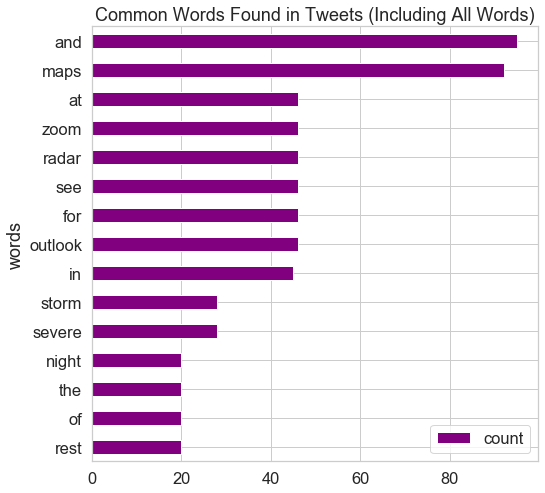

In [16]:
'''Using this, we can create a horizontal bar graph of the
top 15 most common words in the tweets'''

fig,ax = plt.subplots(figsize=(8,8))

#Plot a horizontal bar graph

clean_tweet_no_urls.sort_values(by='count').plot.barh(x='words',
                        y='count',
                        ax=ax,
                        color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [17]:
'''Now to perform additional clean-up, such as removing irrelevant
words that do not add meaningful information to the text
you are trying to analyze, which are referred to as "stop words"'''

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
list(stop_words)[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aakashvardhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['so',
 'is',
 'mightn',
 'who',
 'above',
 'such',
 'wouldn',
 'into',
 'through',
 'from']

In [18]:
'''Creating a list containing lowercase words for each tweet
in addition to comparing the words in the original tweet
to the words in the tweet after the stop words are removed'''

tweets_no_sw = [[word for word in tweet_words if not word in stop_words]
               for tweet_words in words_in_tweet]
tweets_no_sw[0]

['severe',
 'storm',
 'outlook',
 'rest',
 'night',
 'see',
 'maps',
 'radar',
 'maps',
 'zoom']

In [19]:
all_words_nsw = list(itertools.chain(*tweets_no_sw))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('maps', 92),
 ('outlook', 46),
 ('see', 46),
 ('radar', 46),
 ('zoom', 46),
 ('severe', 28),
 ('storm', 28),
 ('rest', 20),
 ('night', 20),
 ('wx', 12),
 ('tstorms', 11),
 ('evening', 8),
 ('afternoon', 7),
 ('tstorm', 7),
 ('tuesday', 3)]

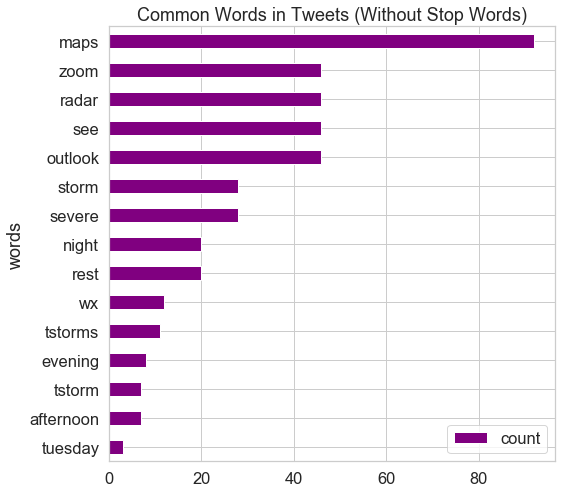

In [20]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                               columns=['words','count'])

fig,ax = plt.subplots(figsize=(8,8))

clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                            y='count',
                            ax=ax,
                            color="purple")

ax.set_title("Common Words in Tweets (Without Stop Words)")

plt.show()

In [21]:

#Remove collection words
collection_words = ['flashfloods','flash','floods']
tweets_nsw_nc = [[w for w in word if not w in collection_words] for word in tweets_no_sw]

In [22]:
#Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

#View Bigrams for the first tweet
terms_bigram[0]

[('severe', 'storm'),
 ('storm', 'outlook'),
 ('outlook', 'rest'),
 ('rest', 'night'),
 ('night', 'see'),
 ('see', 'maps'),
 ('maps', 'radar'),
 ('radar', 'maps'),
 ('maps', 'zoom')]

In [23]:
# Original tweet without URLs
tweets_no_urls[0]

'severe storm outlook for rest of the night see maps and radar maps and zoom in at'

In [24]:
# Clean Tweet
tweets_nsw_nc[0]

['severe',
 'storm',
 'outlook',
 'rest',
 'night',
 'see',
 'maps',
 'radar',
 'maps',
 'zoom']

In [25]:
'''We will be using a counter to capture the bigrams as dictionary keys and
their counts are as dictionary values'''
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('see', 'maps'), 46),
 (('maps', 'radar'), 46),
 (('radar', 'maps'), 46),
 (('maps', 'zoom'), 46),
 (('severe', 'storm'), 28),
 (('storm', 'outlook'), 28),
 (('outlook', 'rest'), 20),
 (('rest', 'night'), 20),
 (('night', 'see'), 20),
 (('zoom', 'wx'), 12),
 (('tstorms', 'outlook'), 11),
 (('evening', 'see'), 8),
 (('outlook', 'afternoon'), 7),
 (('tstorm', 'outlook'), 7),
 (('outlook', 'evening'), 5),
 (('afternoon', 'see'), 4),
 (('afternoon', 'evening'), 3),
 (('outlook', 'tuesday'), 3),
 (('tuesday', 'see'), 3),
 (('outlook', 'saturday'), 2)]

In [26]:
#Created a pandas dataframe from the counter
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(see, maps)",46
1,"(maps, radar)",46
2,"(radar, maps)",46
3,"(maps, zoom)",46
4,"(severe, storm)",28
5,"(storm, outlook)",28
6,"(outlook, rest)",20
7,"(rest, night)",20
8,"(night, see)",20
9,"(zoom, wx)",12


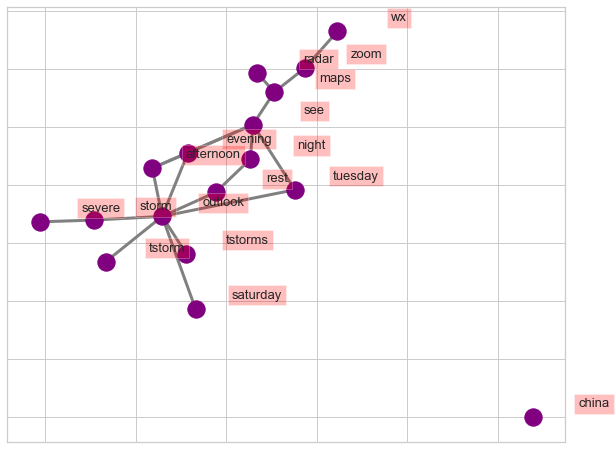

In [29]:
'''This dataframe can be used to visualise the top 20
occurring bigrams as networks using the package networkx'''
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = networkx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = networkx.spring_layout(G, k=1)

# Plot networks
networkx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()